<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/09_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3></h3>

In [ ]:
# 사전데이터 준비
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
# 데이터 정보확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
# 데이터 통계
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# 필요한 데이터 numpy로 변환
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
# train, test 데이터 분배. 여기선 test데이터 20%로 지정하기!!
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, train_size=0.2, random_state=42)      # train_size=     <-defualt 25%

In [ ]:
# 개수확인
print('train : ', train_input.shape, '\ntest : ', test_input.shape)

train :  (1299, 3) 
test :  (5198, 3)


In [ ]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 로지스틱 회귀모델로 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print('train : ', lr.score(train_scaled, train_target), '\ntest : ', lr.score(test_scaled, test_target))

train :  0.7936874518860662 
test :  0.7718353212774144


### 로지스틱 회귀모델 학습결과 정확도는 train > test 이면서 정확도가 둘다 낮아서 과소적합이 발생되었다.

In [ ]:
# 계수와 절편 확인
print('계수 : ', lr.coef_, '\n절편 : ', lr.intercept_)

계수 :  [[ 0.41387737  1.5161459  -0.74554688]] 
절편 :  [1.90128634]


<br><br>

### 결정 트리
결정 트리 모델은 스무고개와 같다.<br>
데이터를 나눌수 있는 질문을 찾으면 분류가 정확도가 높아진다

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print('train : ', dt.score(train_scaled, train_target), '\ntest : ', dt.score(test_scaled, test_target))

train :  0.9992301770592764 
test :  0.8358984224701809


#### 위 결과를 확인해보면 과대적합이 발생했다.(정확도는 높고 tarin > test)

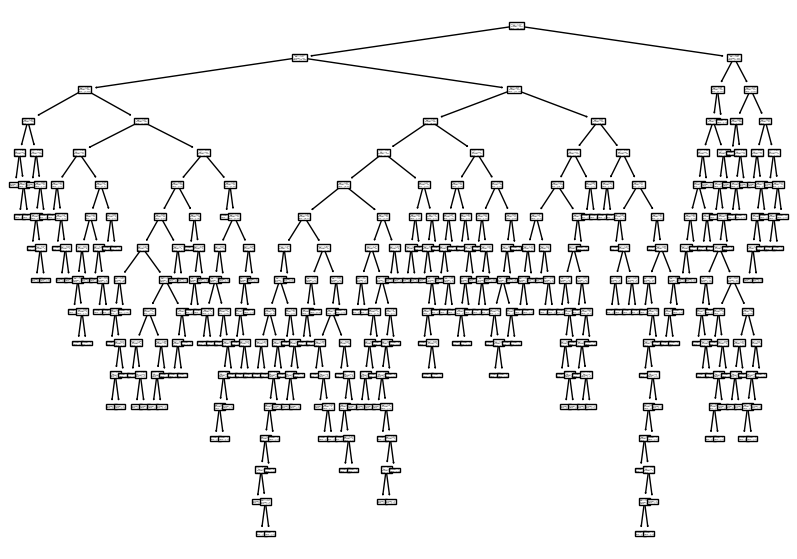

In [ ]:
# 트리모델 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree      # 결정 트리 그림으로 확인할수있는 메소드

plt.figure(figsize=(10,7))              # size 지정
plot_tree(dt)                           # 맷폴라이브에서 트리그림 확인
plt.show()

#### 위 그림에서 맨 위 노드는 '루트 노드', 맨 아래노드는 '리프 노드' 라고 한다.

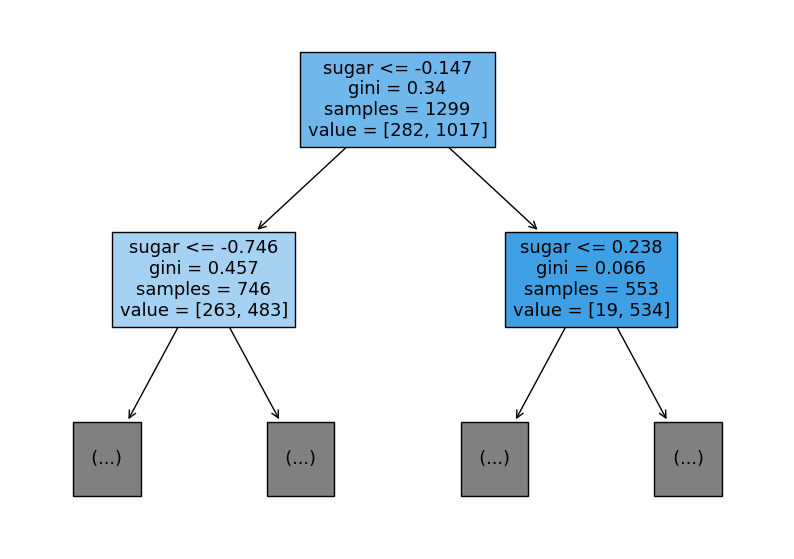

In [ ]:
# 위에 노드는 너무 복잡해서 루트 노드를 제외하고 1개를 보는 방법
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
            # ↑ max_depth =   <- 매개변수를 이용해서 해당 개수의 노드 확인가능
                          # ↑ filled=   <- 클래스에 맞게 노드의 색을 칠할수 있다.
                                          # ↑ feature_names=   <- 특성의 이름을 전달
plt.show()

### 위 노드박스를 확인하면 gini 라는 특성이 있다.
<br>
gini는 '지니 불순도' 라고 불리고 노드에서 데이터를 분할할 때 기준이 된다.<br>
지니 불순도 구하는 공식은 <br>
지니 불순도 = 1 - (음성클래스 비율² + 양성 클래스 비율²)<br><br>
현재 사용중인 데이터를 기준으로 지니 불순도 구하는 방법은<br>
전체 데이터 : 5197<br>양성 데이터 : 3939<br>음성 데이터 : 1258
<br>
1-((1256 / 5197)² + (3939 / 5197)²) = 0.367
<br><br>

### 결정 트리 모델
결정 트리 모델은 부모 노드와 자식 노드의 불순도 차이가 가능한 크도록 트리를 만든다.
<br>
부모 노드와 자식노드의 차이 계산하는 방법은 자식노드의 불순도를 샘플 개수에 비례하여 모두 더하고, 부모노드의 불순도에서 빼주면 된다
<br>
공식 : 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도- (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도<br>
현재 사용중인 데이터 기준으로 불순도의 차이는<br>
0.367 - (2922 / 5197) * 0.481 - (2275 / 5197) * 0.069 = 0.066


In [ ]:
# 많은 노드 가지치기 매개변수 : max_depth 를 이용해서 3개의 노드만 가지고 학습
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print('train : ', dt.score(train_scaled, train_target), '\ntest : ', dt.score(test_scaled, test_target))

train :  0.859122401847575 
test :  0.8149288187764525


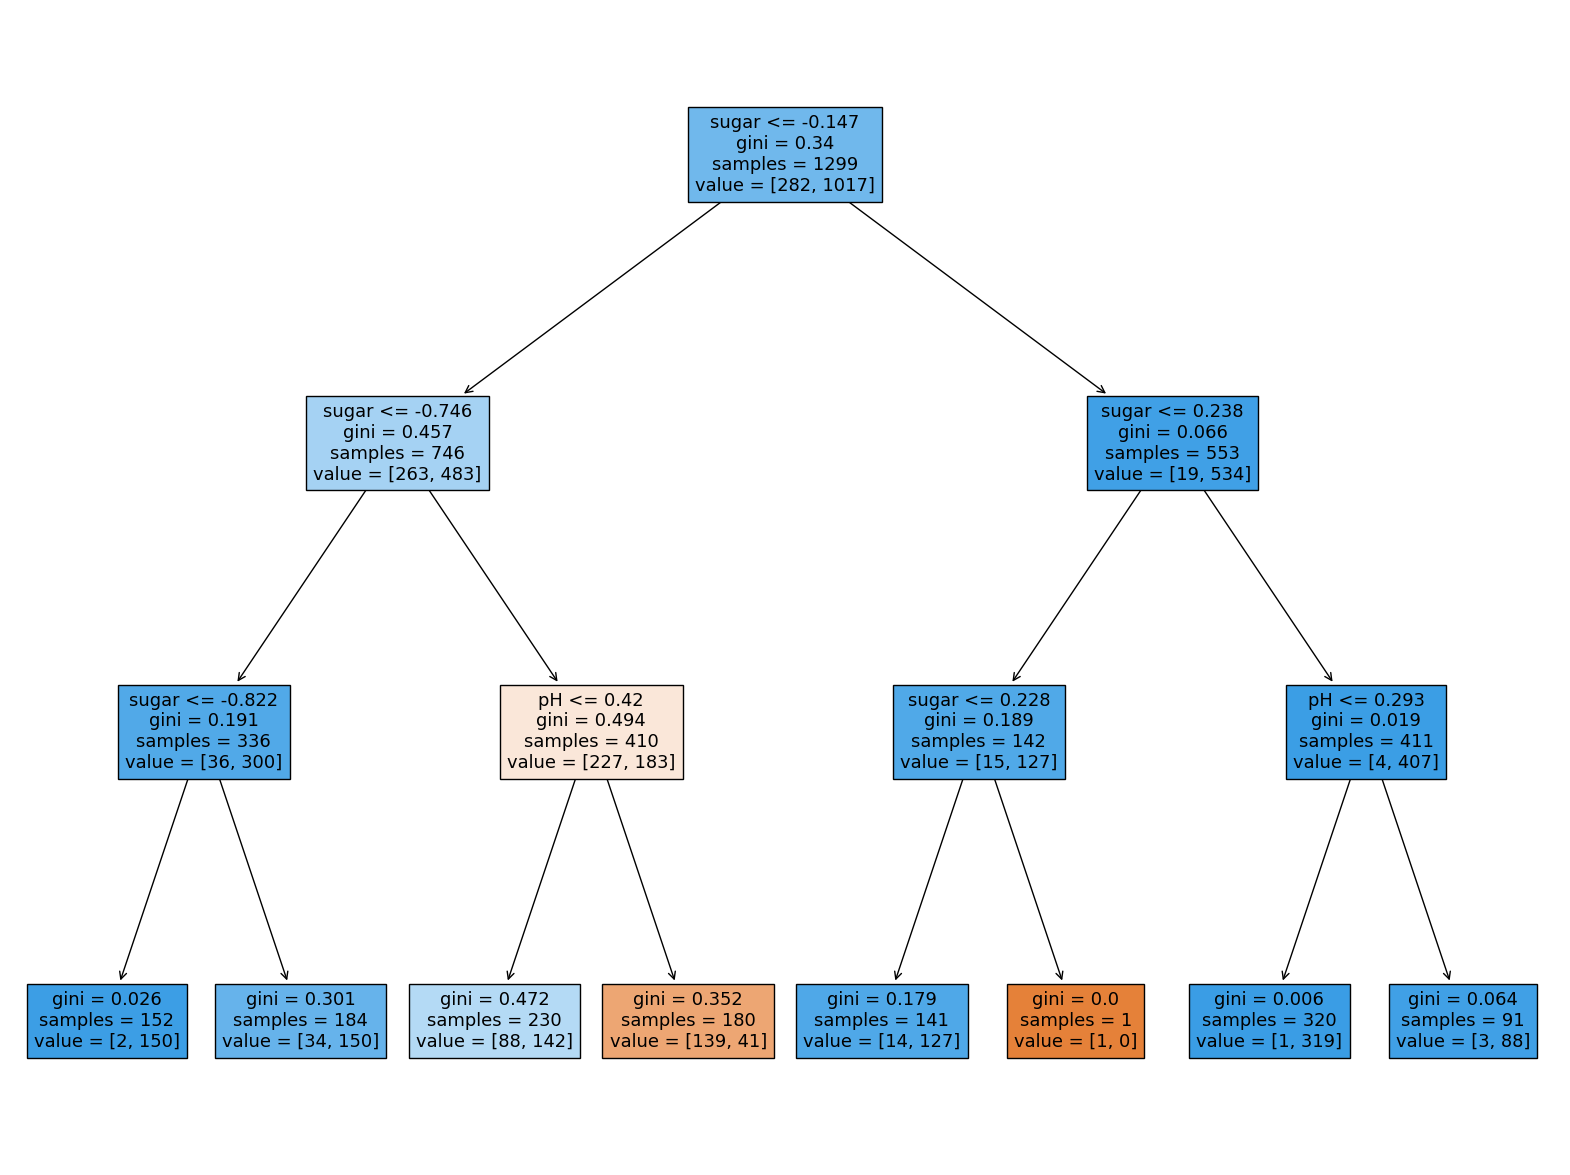

In [ ]:
# 트리 구조 파악하기
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 전처리 하기 전 데이터이용해서 트리 구조 확인
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print('train : ', dt.score(train_input, train_target), '\ntest : ', dt.score(test_input, test_target))

train :  0.859122401847575 
test :  0.8149288187764525


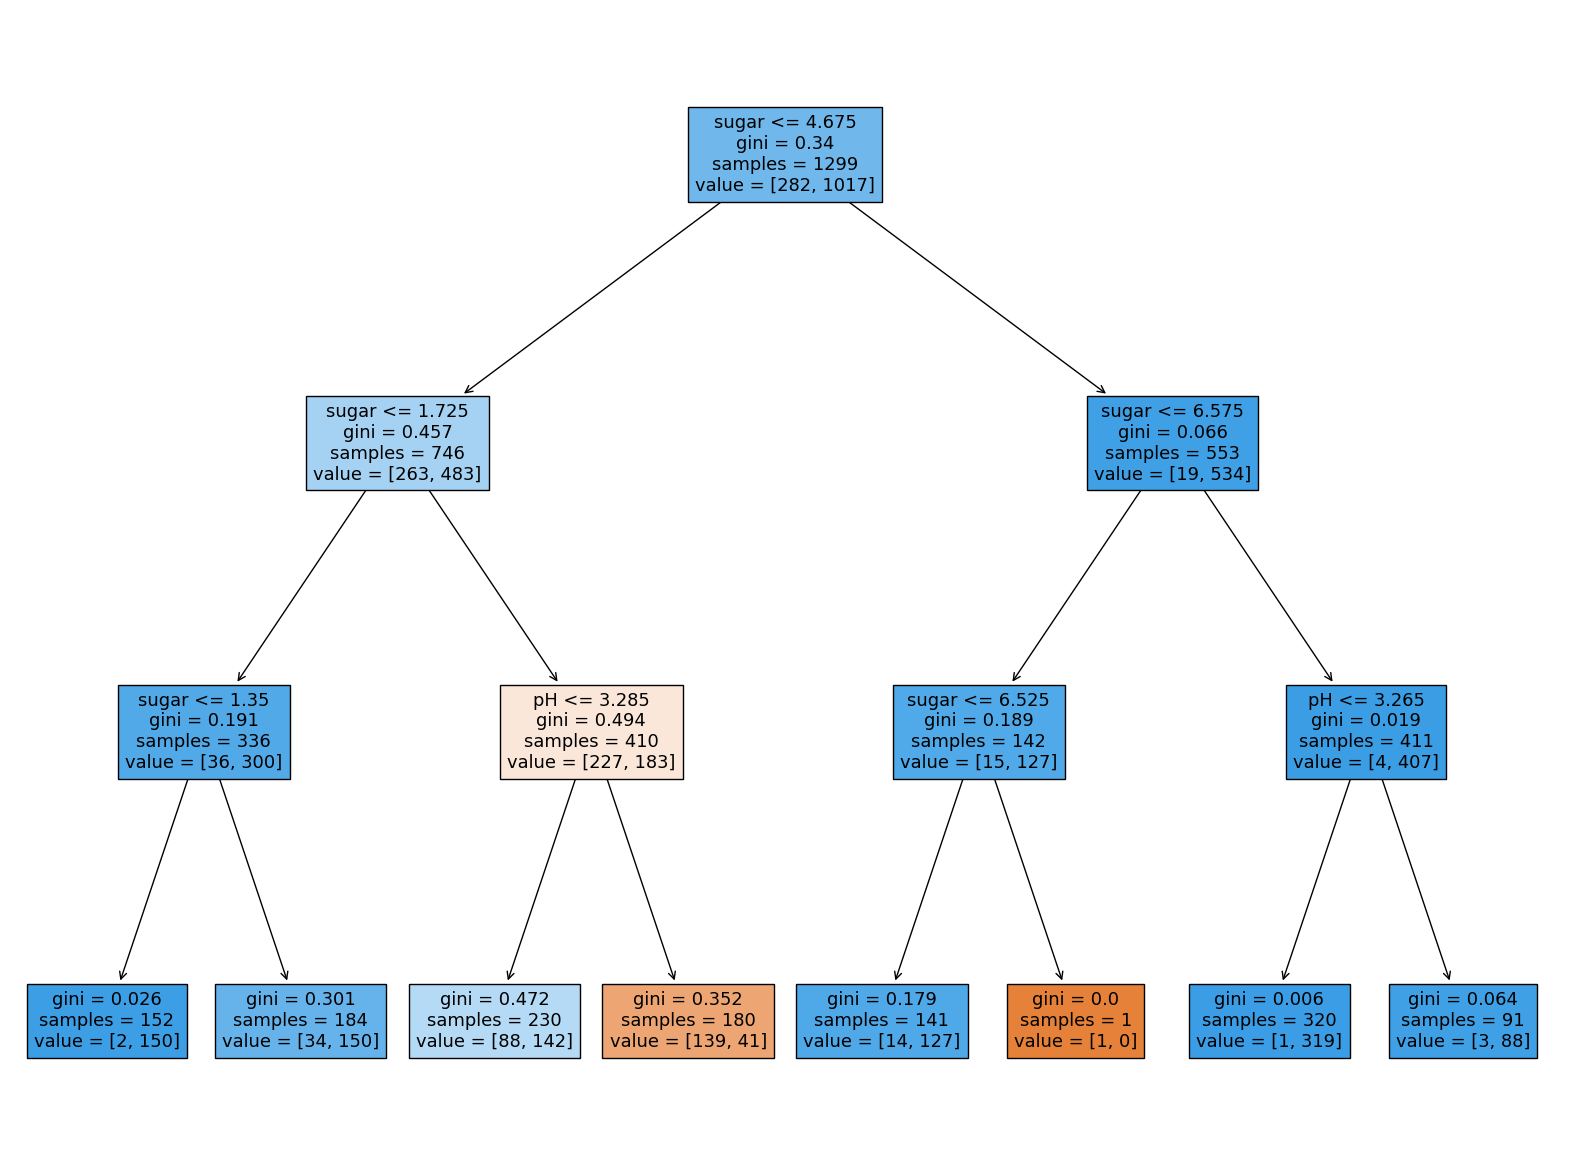

In [ ]:
# 트리구조 시각화
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 특성 중요도 확인
print(dt.feature_importances_)

[0.         0.82626651 0.17373349]
